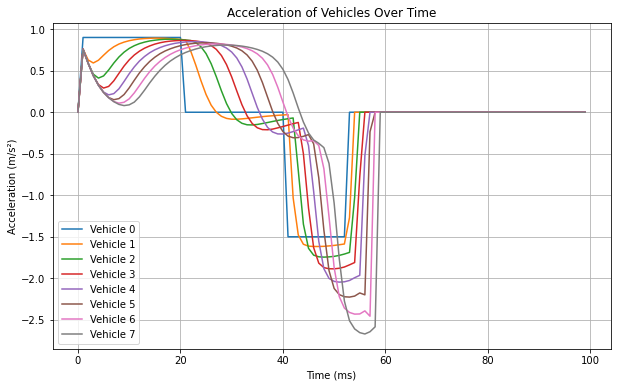

acc


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,0.000120,0.000250,0.000300,0.000230,0.00021,0.000220,0.000190,0.000180
std,0.660303,0.660643,0.673866,0.693551,0.71869,0.749907,0.785609,0.819064
min,-1.499000,-1.616000,-1.744000,-1.885000,-2.04500,-2.225000,-2.455000,-2.669000
25%,0.000000,-0.030000,-0.003500,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.117250,0.430250,0.429750,0.44650,0.481250,0.505000,0.528750
max,0.900000,0.892000,0.879000,0.864000,0.85000,0.836000,0.822000,0.809000


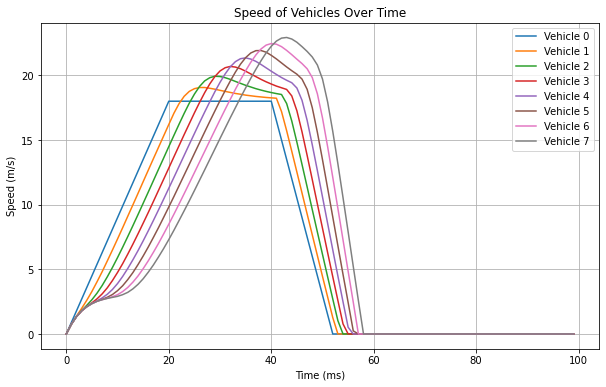

speed


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000
mean,6.480000,6.514400,6.547700,6.581100,6.6131,6.645100,6.675800,6.707700
std,7.617205,7.745151,7.855619,7.955387,8.0444,8.124112,8.192442,8.246256
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,1.200000,1.330000,1.580000,1.955000,2.2350,2.395000,2.495000,2.615000
75%,15.075000,14.660000,14.575000,13.997500,14.0150,13.592500,13.505000,13.245000
max,18.000000,19.060000,19.930000,20.690000,21.3500,21.920000,22.460000,22.930000


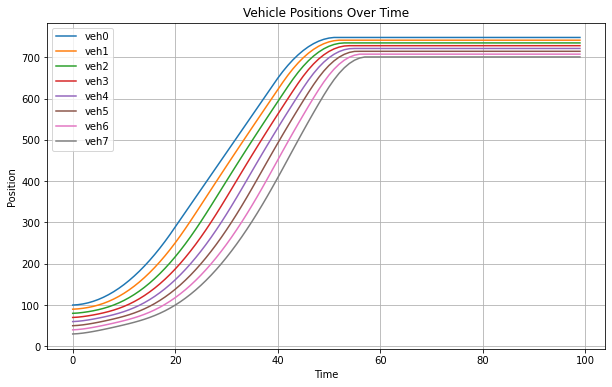

postion


,0,1,2,3,4,5,6,7
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.933333,0.839667,0.839667,0.839667,0.839667,0.839667,0.839667,0.839667
std,0.057735,0.138854,0.138854,0.138854,0.138854,0.138854,0.138854,0.138854
min,0.900000,0.759000,0.759000,0.759000,0.759000,0.759000,0.759000,0.759000
25%,0.900000,0.759500,0.759500,0.759500,0.759500,0.759500,0.759500,0.759500
50%,0.900000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000
75%,0.950000,0.880000,0.880000,0.880000,0.880000,0.880000,0.880000,0.880000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#1. highway#################################################################################33
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 解析 XML 文件
tree = ET.parse('Vehicle_highway_acc.xml')
root = tree.getroot()

# 初始化字典以存储车辆数据
vehicles = {}
time_steps = set()

# 提取车辆数据
for motion_state in root.findall('motionState'):
    vehicle_id = motion_state.get('vehicle')
    time = int(motion_state.get('time'))/1000
    speed = float(motion_state.get('speed'))/100
    acceleration = float(motion_state.get('acceleration')) / 1000  # 将加速度从 cm/s² 转换成 m/s²
    time_steps.add(time)

    if vehicle_id not in vehicles:
        vehicles[vehicle_id] = {'times': [], 'speeds': [], 'accelerations': []}

    vehicles[vehicle_id]['times'].append(time)
    vehicles[vehicle_id]['speeds'].append(speed)
    vehicles[vehicle_id]['accelerations'].append(acceleration)

# 创建车辆的 DataFrame
vehicles_df = pd.DataFrame(vehicles).T

# 计算统计信息
acc_stats = vehicles_df['accelerations'].apply(pd.Series).T.describe()
speed_stats = vehicles_df['speeds'].apply(pd.Series).T.describe()
#time_stats = vehicles_df['times'].apply(pd.Series).describe()

# 画加速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['accelerations'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('acc')
display(acc_stats)
# 画速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['speeds'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Speed (m/s)')
plt.title('Speed of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('speed')
display(speed_stats)

# 解析 XML 文件
tree = ET.parse('Vehicle_highway_data.xml')
root = tree.getroot()

# 初始化速度和位置列表
speed_data = {f'veh{i}': [] for i in range(8)}
position_data = {f'veh{i}': [] for i in range(8)}

# 遍历 XML 数据并提取速度和位置信息
for timestep in root.findall('timestep'):
    time = timestep.get('time')
    for edge in timestep.findall('.//edge[@id="edge1"]'):
        for lane in edge.findall('.//lane[@id="edge1_0"]'):
            for vehicle in lane.findall('.//vehicle'):
                vehicle_id = vehicle.get('id')
                speed = float(vehicle.get('speed'))
                position = float(vehicle.get('pos'))
                speed_data[vehicle_id].append((float(time), speed))
                position_data[vehicle_id].append((float(time), position))
# 创建车辆的 DataFrame
pos_stats = position_data.T.applymap(lambda x: x[1]).apply(pd.Series).describe()

# 计算统计信息
#pos_stats = vehicles_df['pos'].apply(pd.Series).T.describe()

# 绘制位置图
plt.figure(figsize=(10, 6))
for vehicle, data in position_data.items():
    times, positions = zip(*data)
    plt.plot(times, positions, label=vehicle)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Vehicle Positions Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('postion')
display(pos_stats)

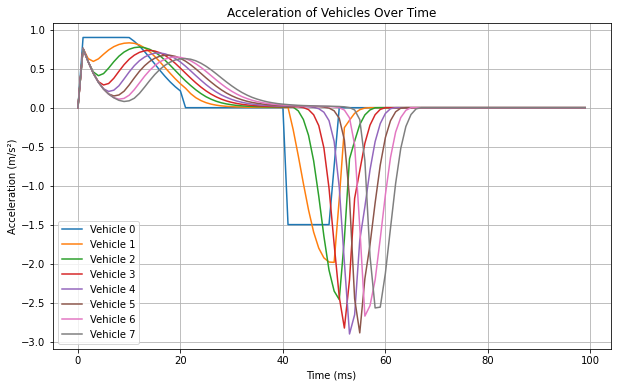

acc


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.000080,0.000130,0.000170,0.000130,0.000120,0.000170,0.000170,0.000110
std,0.569326,0.562429,0.571382,0.577539,0.578103,0.573917,0.568269,0.564162
min,-1.499000,-1.983000,-2.460000,-2.825000,-2.901000,-2.887000,-2.672000,-2.567000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.016000
75%,0.000000,0.049750,0.116000,0.183500,0.212000,0.193000,0.183250,0.186000
max,0.900000,0.831000,0.777000,0.759000,0.759000,0.759000,0.759000,0.759000


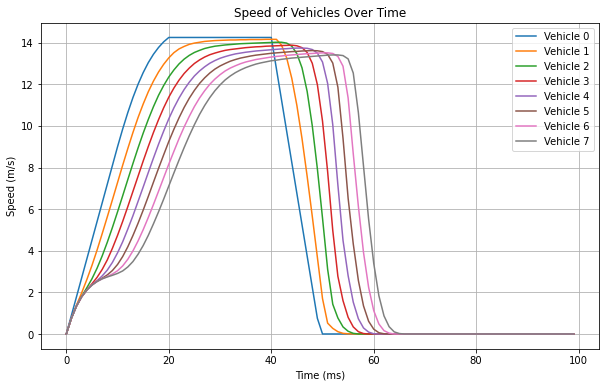

speed


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.202000,5.232700,5.262300,5.292600,5.322700,5.352600,5.382700,5.412400
std,6.190241,6.099471,6.008103,5.917516,5.827476,5.740403,5.657079,5.578211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,1.390000,1.955000,2.460000,2.625000,2.820000,2.970000
75%,12.822500,12.682500,12.715000,12.585000,12.460000,12.367500,12.302500,12.257500
max,14.250000,14.160000,14.020000,13.880000,13.740000,13.620000,13.510000,13.410000


AttributeError: 'dict' object has no attribute 'T'

In [71]:
#2. city#################################################################################33
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 解析 XML 文件
# tree = ET.parse('Vehicle_city_acc.xml')
tree = ET.parse('Vehicle.xml')
root = tree.getroot()

# 初始化字典以存储车辆数据
vehicles = {}
time_steps = set()

# 提取车辆数据
for motion_state in root.findall('motionState'):
    vehicle_id = motion_state.get('vehicle')
    time = int(motion_state.get('time'))/1000
    speed = float(motion_state.get('speed'))/100
    acceleration = float(motion_state.get('acceleration')) / 1000  # 将加速度从 cm/s² 转换成 m/s²
    time_steps.add(time)

    if vehicle_id not in vehicles:
        vehicles[vehicle_id] = {'times': [], 'speeds': [], 'accelerations': []}

    vehicles[vehicle_id]['times'].append(time)
    vehicles[vehicle_id]['speeds'].append(speed)
    vehicles[vehicle_id]['accelerations'].append(acceleration)

# 创建车辆的 DataFrame
vehicles_df = pd.DataFrame(vehicles).T

# 计算统计信息
acc_stats = vehicles_df['accelerations'].apply(pd.Series).T.describe()
speed_stats = vehicles_df['speeds'].apply(pd.Series).T.describe()
#time_stats = vehicles_df['times'].apply(pd.Series).describe()

# 画加速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['accelerations'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('acc')
display(acc_stats)
# 画速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['speeds'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Speed (m/s)')
plt.title('Speed of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('speed')
display(speed_stats)

# 解析 XML 文件
# tree = ET.parse('Vehicle_city_data.xml')
tree = ET.parse('Vehicle_data.xml')
root = tree.getroot()

# 初始化速度和位置列表
speed_data = {f'veh{i}': [] for i in range(8)}
position_data = {f'veh{i}': [] for i in range(8)}

# 遍历 XML 数据并提取速度和位置信息
for timestep in root.findall('timestep'):
    time = timestep.get('time')
    for edge in timestep.findall('.//edge[@id="edge1"]'):
        for lane in edge.findall('.//lane[@id="edge1_0"]'):
            for vehicle in lane.findall('.//vehicle'):
                vehicle_id = vehicle.get('id')
                speed = float(vehicle.get('speed'))
                position = float(vehicle.get('pos'))
                speed_data[vehicle_id].append((float(time), speed))
                position_data[vehicle_id].append((float(time), position))
# 创建车辆的 DataFrame
pos_stats = position_data.T.applymap(lambda x: x[1]).apply(pd.Series).describe()

# 计算统计信息
#pos_stats = vehicles_df['pos'].apply(pd.Series).T.describe()

# 绘制位置图
plt.figure(figsize=(10, 6))
for vehicle, data in position_data.items():
    times, positions = zip(*data)
    plt.plot(times, positions, label=vehicle)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Vehicle Positions Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('postion')
display(pos_stats)

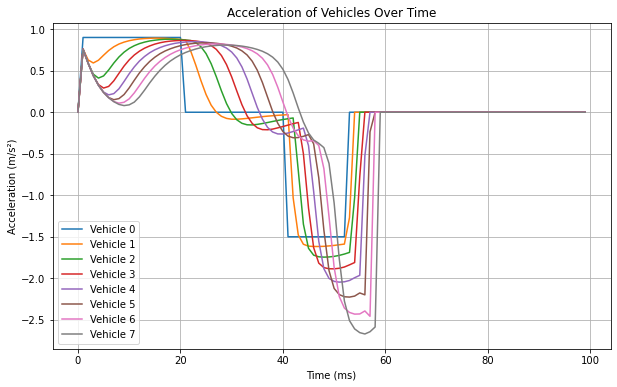

acc


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.000120,0.000250,0.00030,0.000240,0.000200,0.000200,0.000210,0.000180
std,0.660303,0.660651,0.67389,0.693549,0.718667,0.749887,0.785594,0.819084
min,-1.499000,-1.616000,-1.74400,-1.885000,-2.045000,-2.225000,-2.456000,-2.669000
25%,0.000000,-0.030000,-0.00350,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.117250,0.43025,0.429750,0.446500,0.481250,0.505000,0.528750
max,0.900000,0.892000,0.87900,0.864000,0.850000,0.835000,0.822000,0.809000


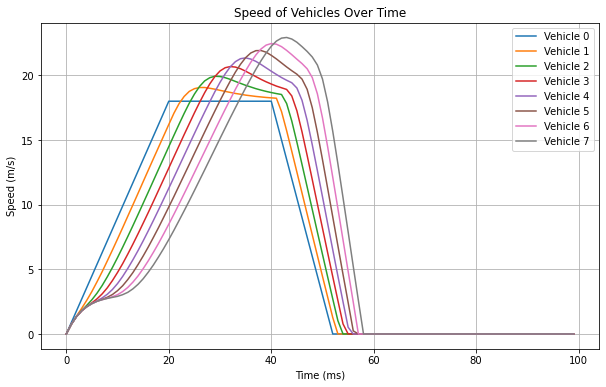

speed


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,6.480000,6.514300,6.547800,6.581000,6.61320,6.645000,6.675800,6.70750
std,7.617205,7.744996,7.855658,7.955208,8.04445,8.123935,8.192442,8.24572
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,1.200000,1.330000,1.580000,1.955000,2.23500,2.395000,2.495000,2.62000
75%,15.075000,14.660000,14.575000,13.997500,14.01500,13.592500,13.505000,13.24500
max,18.000000,19.060000,19.930000,20.680000,21.35000,21.920000,22.460000,22.93000


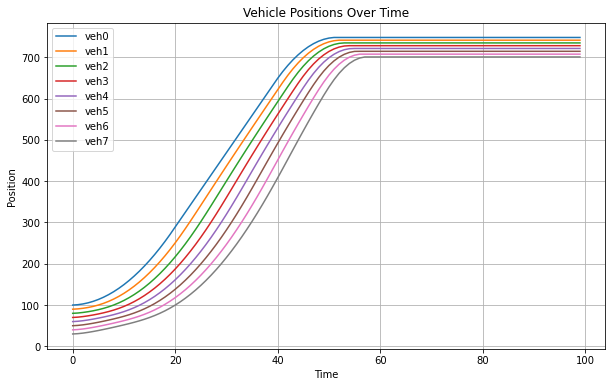

postion


,0,1,2,3,4,5,6,7
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.933333,0.839667,0.839667,0.839667,0.839667,0.839667,0.839667,0.839667
std,0.057735,0.138854,0.138854,0.138854,0.138854,0.138854,0.138854,0.138854
min,0.900000,0.759000,0.759000,0.759000,0.759000,0.759000,0.759000,0.759000
25%,0.900000,0.759500,0.759500,0.759500,0.759500,0.759500,0.759500,0.759500
50%,0.900000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000
75%,0.950000,0.880000,0.880000,0.880000,0.880000,0.880000,0.880000,0.880000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# tau-highway#################################################################################33
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 解析 XML 文件
tree = ET.parse('Vehicle_highway_acc_tau.xml')
root = tree.getroot()

# 初始化字典以存储车辆数据
vehicles = {}
time_steps = set()

# 提取车辆数据
for motion_state in root.findall('motionState'):
    vehicle_id = motion_state.get('vehicle')
    time = int(motion_state.get('time'))/1000
    speed = float(motion_state.get('speed'))/100
    acceleration = float(motion_state.get('acceleration')) / 1000  # 将加速度从 cm/s² 转换成 m/s²
    time_steps.add(time)

    if vehicle_id not in vehicles:
        vehicles[vehicle_id] = {'times': [], 'speeds': [], 'accelerations': []}

    vehicles[vehicle_id]['times'].append(time)
    vehicles[vehicle_id]['speeds'].append(speed)
    vehicles[vehicle_id]['accelerations'].append(acceleration)

# 创建车辆的 DataFrame
vehicles_df = pd.DataFrame(vehicles).T

# 计算统计信息
acc_stats = vehicles_df['accelerations'].apply(pd.Series).T.describe()
speed_stats = vehicles_df['speeds'].apply(pd.Series).T.describe()
#time_stats = vehicles_df['times'].apply(pd.Series).describe()

# 画加速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['accelerations'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('acc')
display(acc_stats)
# 画速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['speeds'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Speed (m/s)')
plt.title('Speed of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('speed')
display(speed_stats)

# 解析 XML 文件
tree = ET.parse('Vehicle_highway_data_tau.xml')
root = tree.getroot()

# 初始化速度和位置列表
speed_data = {f'veh{i}': [] for i in range(8)}
position_data = {f'veh{i}': [] for i in range(8)}

# 遍历 XML 数据并提取速度和位置信息
for timestep in root.findall('timestep'):
    time = timestep.get('time')
    for edge in timestep.findall('.//edge[@id="edge1"]'):
        for lane in edge.findall('.//lane[@id="edge1_0"]'):
            for vehicle in lane.findall('.//vehicle'):
                vehicle_id = vehicle.get('id')
                speed = float(vehicle.get('speed'))
                position = float(vehicle.get('pos'))
                speed_data[vehicle_id].append((float(time), speed))
                position_data[vehicle_id].append((float(time), position))
# 创建车辆的 DataFrame
pos_stats = vehicles_df.T.applymap(lambda x: x[1]).apply(pd.Series).describe()

# 计算统计信息
#pos_stats = vehicles_df['pos'].apply(pd.Series).T.describe()

# 绘制位置图
plt.figure(figsize=(10, 6))
for vehicle, data in position_data.items():
    times, positions = zip(*data)
    plt.plot(times, positions, label=vehicle)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Vehicle Positions Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('postion')
display(pos_stats)

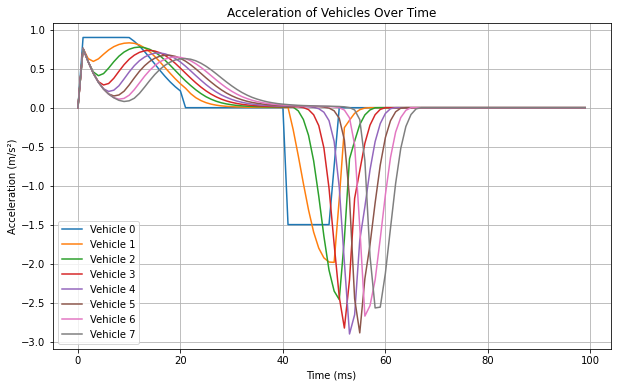

acc


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.000080,0.000130,0.000170,0.000130,0.000120,0.000170,0.000170,0.000110
std,0.569326,0.562429,0.571382,0.577539,0.578103,0.573917,0.568269,0.564162
min,-1.499000,-1.983000,-2.460000,-2.825000,-2.901000,-2.887000,-2.672000,-2.567000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.016000
75%,0.000000,0.049750,0.116000,0.183500,0.212000,0.193000,0.183250,0.186000
max,0.900000,0.831000,0.777000,0.759000,0.759000,0.759000,0.759000,0.759000


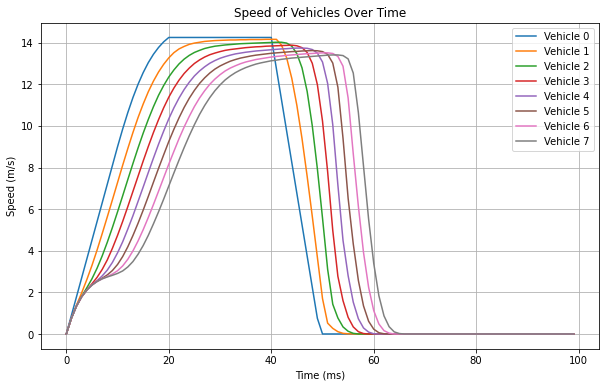

speed


,0,1,2,3,4,5,6,7
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.202000,5.232700,5.262300,5.292600,5.322700,5.352600,5.382700,5.412400
std,6.190241,6.099471,6.008103,5.917516,5.827476,5.740403,5.657079,5.578211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,1.390000,1.955000,2.460000,2.625000,2.820000,2.970000
75%,12.822500,12.682500,12.715000,12.585000,12.460000,12.367500,12.302500,12.257500
max,14.250000,14.160000,14.020000,13.880000,13.740000,13.620000,13.510000,13.410000


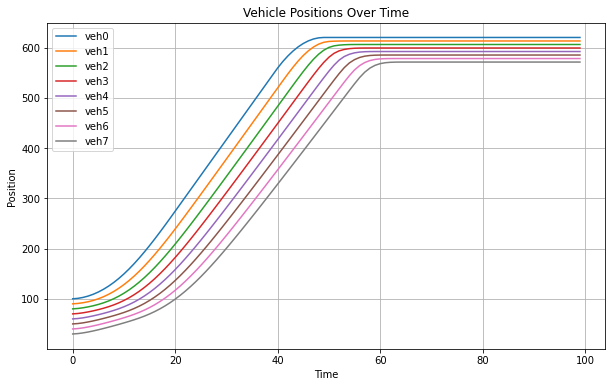

postion


,0,1,2,3,4,5,6,7
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.933333,0.839667,0.839667,0.839667,0.839667,0.839667,0.839667,0.839667
std,0.057735,0.138854,0.138854,0.138854,0.138854,0.138854,0.138854,0.138854
min,0.900000,0.759000,0.759000,0.759000,0.759000,0.759000,0.759000,0.759000
25%,0.900000,0.759500,0.759500,0.759500,0.759500,0.759500,0.759500,0.759500
50%,0.900000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000
75%,0.950000,0.880000,0.880000,0.880000,0.880000,0.880000,0.880000,0.880000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# tau-city#################################################################################33
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 解析 XML 文件
tree = ET.parse('Vehicle_city_acc_tau.xml')
root = tree.getroot()

# 初始化字典以存储车辆数据
vehicles = {}
time_steps = set()

# 提取车辆数据
for motion_state in root.findall('motionState'):
    vehicle_id = motion_state.get('vehicle')
    time = int(motion_state.get('time'))/1000
    speed = float(motion_state.get('speed'))/100
    acceleration = float(motion_state.get('acceleration')) / 1000  # 将加速度从 cm/s² 转换成 m/s²
    time_steps.add(time)

    if vehicle_id not in vehicles:
        vehicles[vehicle_id] = {'times': [], 'speeds': [], 'accelerations': []}

    vehicles[vehicle_id]['times'].append(time)
    vehicles[vehicle_id]['speeds'].append(speed)
    vehicles[vehicle_id]['accelerations'].append(acceleration)

# 创建车辆的 DataFrame
vehicles_df = pd.DataFrame(vehicles).T

# 计算统计信息
acc_stats = vehicles_df['accelerations'].apply(pd.Series).T.describe()
speed_stats = vehicles_df['speeds'].apply(pd.Series).T.describe()
#time_stats = vehicles_df['times'].apply(pd.Series).describe()

# 画加速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['accelerations'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('acc')
display(acc_stats)
# 画速度图
plt.figure(figsize=(10, 6))
for vehicle_id, data in vehicles.items():
    plt.plot(data['times'], data['speeds'], label=f'Vehicle {vehicle_id}')
plt.xlabel('Time (ms)')
plt.ylabel('Speed (m/s)')
plt.title('Speed of Vehicles Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('speed')
display(speed_stats)

# 解析 XML 文件
tree = ET.parse('Vehicle_city_data_tau.xml')
root = tree.getroot()

# 初始化速度和位置列表
speed_data = {f'veh{i}': [] for i in range(8)}
position_data = {f'veh{i}': [] for i in range(8)}

# 遍历 XML 数据并提取速度和位置信息
for timestep in root.findall('timestep'):
    time = timestep.get('time')
    for edge in timestep.findall('.//edge[@id="edge1"]'):
        for lane in edge.findall('.//lane[@id="edge1_0"]'):
            for vehicle in lane.findall('.//vehicle'):
                vehicle_id = vehicle.get('id')
                speed = float(vehicle.get('speed'))
                position = float(vehicle.get('pos'))
                speed_data[vehicle_id].append((float(time), speed))
                position_data[vehicle_id].append((float(time), position))
# 创建车辆的 DataFrame
pos_stats = vehicles_df.T.applymap(lambda x: x[1]).apply(pd.Series).describe()

# 计算统计信息
#pos_stats = vehicles_df['pos'].apply(pd.Series).T.describe()

# 绘制位置图
plt.figure(figsize=(10, 6))
for vehicle, data in position_data.items():
    times, positions = zip(*data)
    plt.plot(times, positions, label=vehicle)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Vehicle Positions Over Time')
plt.legend()
plt.grid(True)
plt.show()
print('postion')
print(pos_stats)